In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Reading and Understanding the Data (Regression Part) ###

In [ ]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)

X = california_housing.data  # Features
y = california_housing.target  # Target variable (Median House Value)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

From the Non-null count column, we can see that there's no missing values in the dataset

### Part 2: Visualization ###

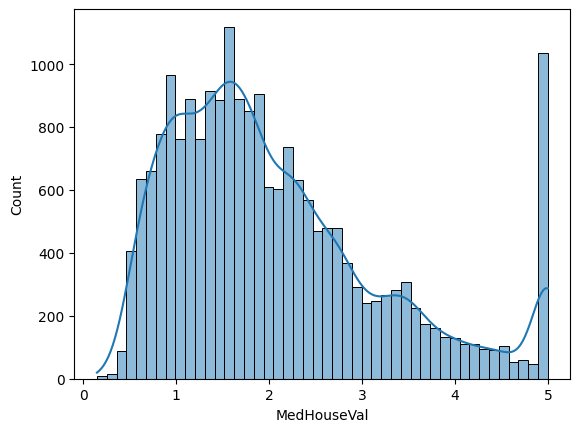

In [5]:
sns.histplot(x=y, kde=True)
plt.show()

- The histogram shows that house values are capped at a maximum value, indicating potential outliers or a threshold in the dataset.

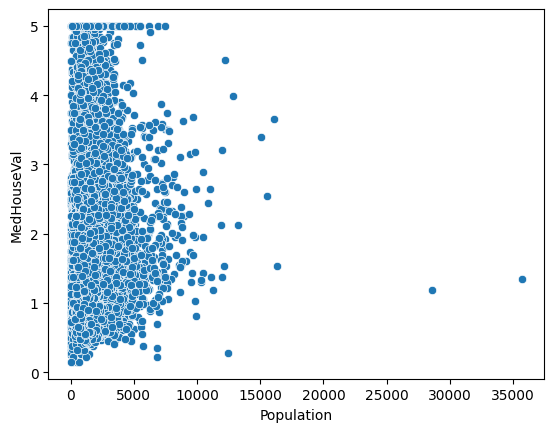

In [6]:
sns.scatterplot(x=X['Population'], y=y)
plt.show()

- Higher populations are generally associated with lower house values, with some outliers

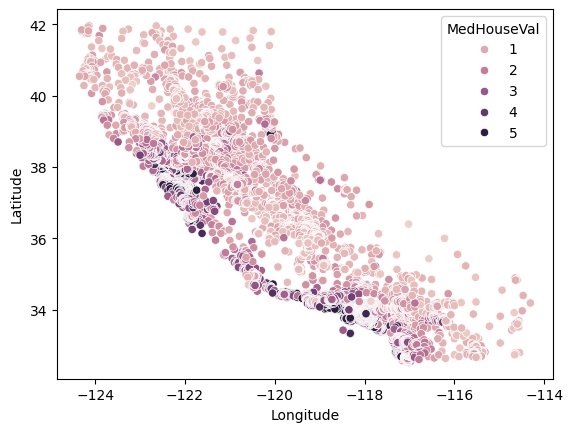

In [7]:
sns.scatterplot(x=X['Longitude'], y=X['Latitude'], hue=y)
plt.show()

- Longitude is highly negatively correlated with Latitude
- Higher house values are concentrated in specific regions

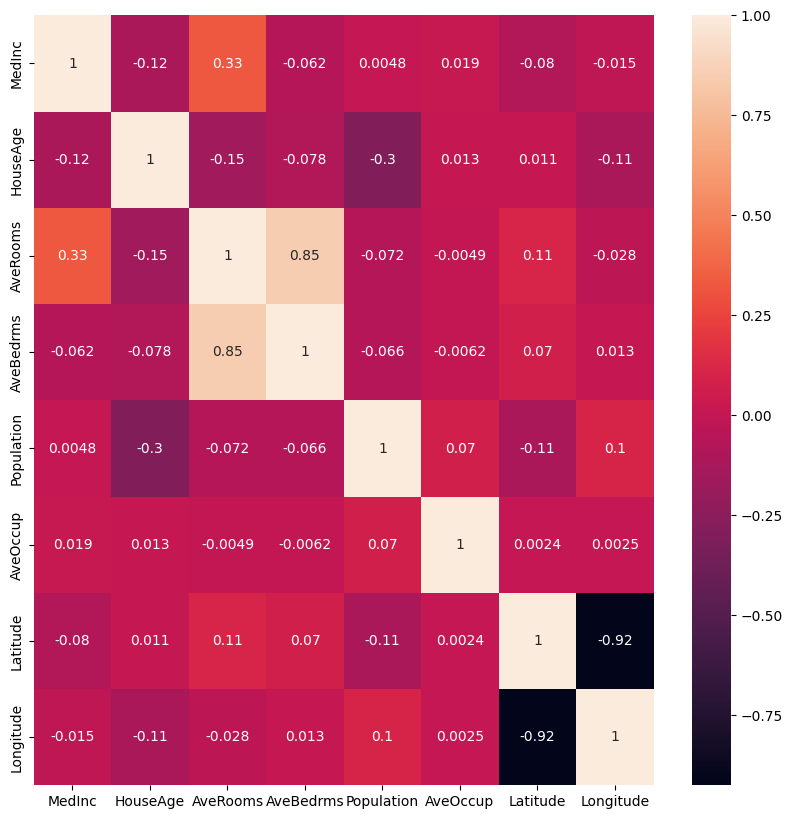

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(numeric_only=True), annot=True)
plt.show()

- Longitude is highly negatively correlated with Latitude.
- All other features have little correlation with each other.

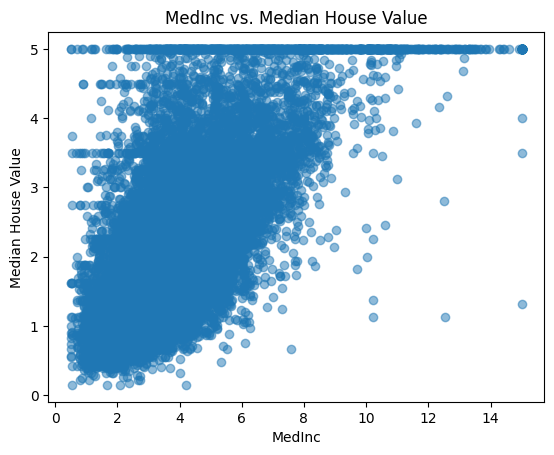

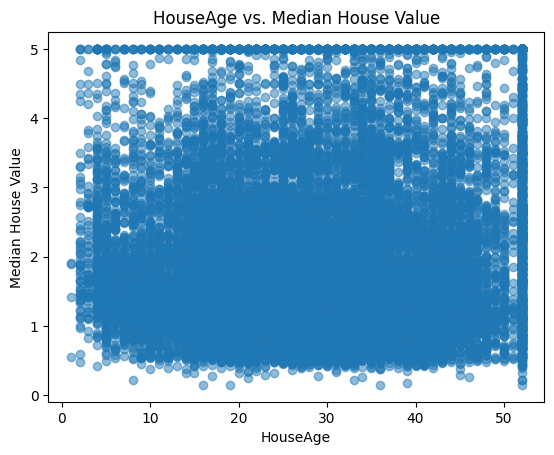

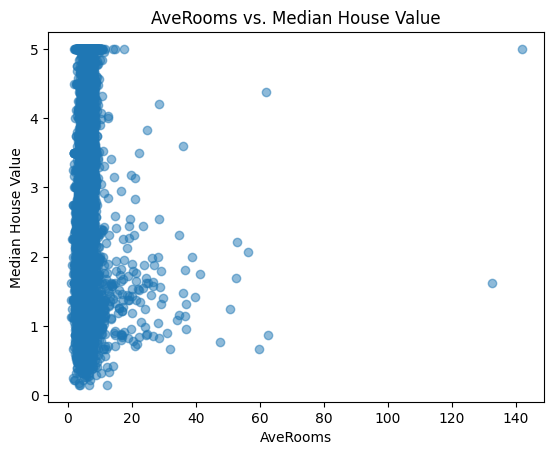

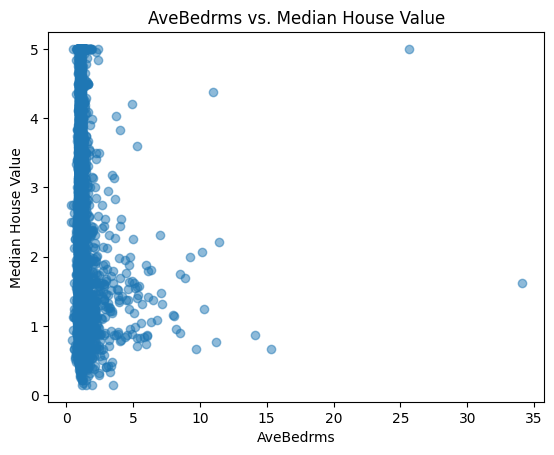

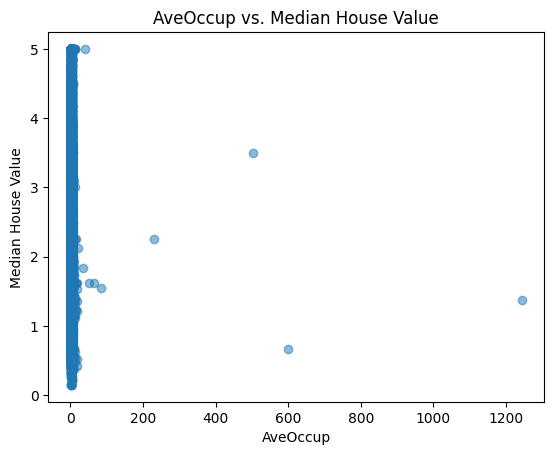

In [29]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
for feature in features:
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f'{feature} vs. Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()


- MedInc has a clear positive relationship with house value.

- HouseAge shows no strong trend.

- AveRooms and AveBedrms appear to have non-linear relationships.

- AveOccup shows some outliers that may need attention.

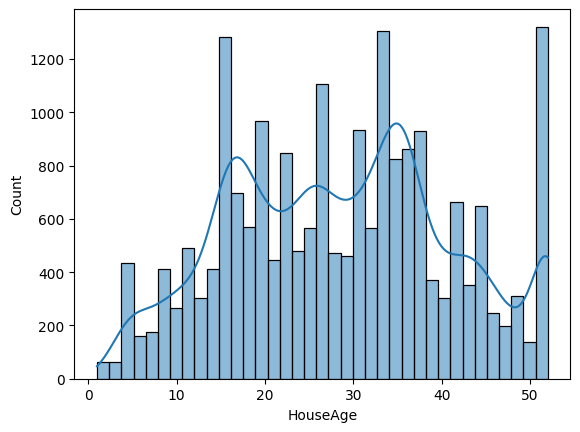

In [9]:
sns.histplot(x=X['HouseAge'], kde=True)
plt.show()

- House age varies significantly with a Symmetrical Distribution.
- Most houses are in the age mark from 15 to 35.
- There's a significant amount of house aged above 50.


### Part 3 Model Creation and Evaluation ###

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.neural_network import MLPRegressor

# Create and train the neural network model
regressor = MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), activation='relu', random_state=42, max_iter=500)
regressor.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [13]:
predictions=regressor.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

0.7809133268257484


R2 score of 0.78 (<0.80) indicate this model is not accurate enough to predict the outcome.

test with hidden layer sizes (100, 75, 50, 25)

In [35]:
# Create and train the neural network model
regressor = MLPRegressor(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', random_state=42, max_iter=500)
regressor.fit(X_train, y_train)

print(r2_score(regressor.predict(X_test), predictions))

0.9219217393625972


using gridsearchCV

In [36]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (125,75,50,25), (300,150,75,40), (200,100,50,25)],
}

grid_regressor = GridSearchCV(MLPRegressor(activation='relu', random_state=42,max_iter=500), param_grid, n_jobs=1)
grid_regressor.fit(X_train, y_train)

GridSearchCV(estimator=MLPRegressor(max_iter=500, random_state=42), n_jobs=1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (125, 75, 50, 25),
                                                (300, 150, 75, 40),
                                                (200, 100, 50, 25)]})

In [37]:
# Best parameters
print(r2_score(grid_regressor.predict(X_test), predictions))
print(grid_regressor.best_params_)

0.895004340495446
{'hidden_layer_sizes': (50, 50)}


### Part 4 Reading and Understanding the Data (Classification part) ###

In [38]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris(as_frame=True)
X_iris = iris_data.data  # Features
y_iris = iris_data.target  # Target variable (species)

# Display basic statistics and general information about Iris dataset
print("Basic Statistics:")
print(X_iris.describe())

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [31]:
print("\nGeneral Information:")
print(X_iris.info())


General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


From the Non-null count column, we can see that there's no missing values in the dataset

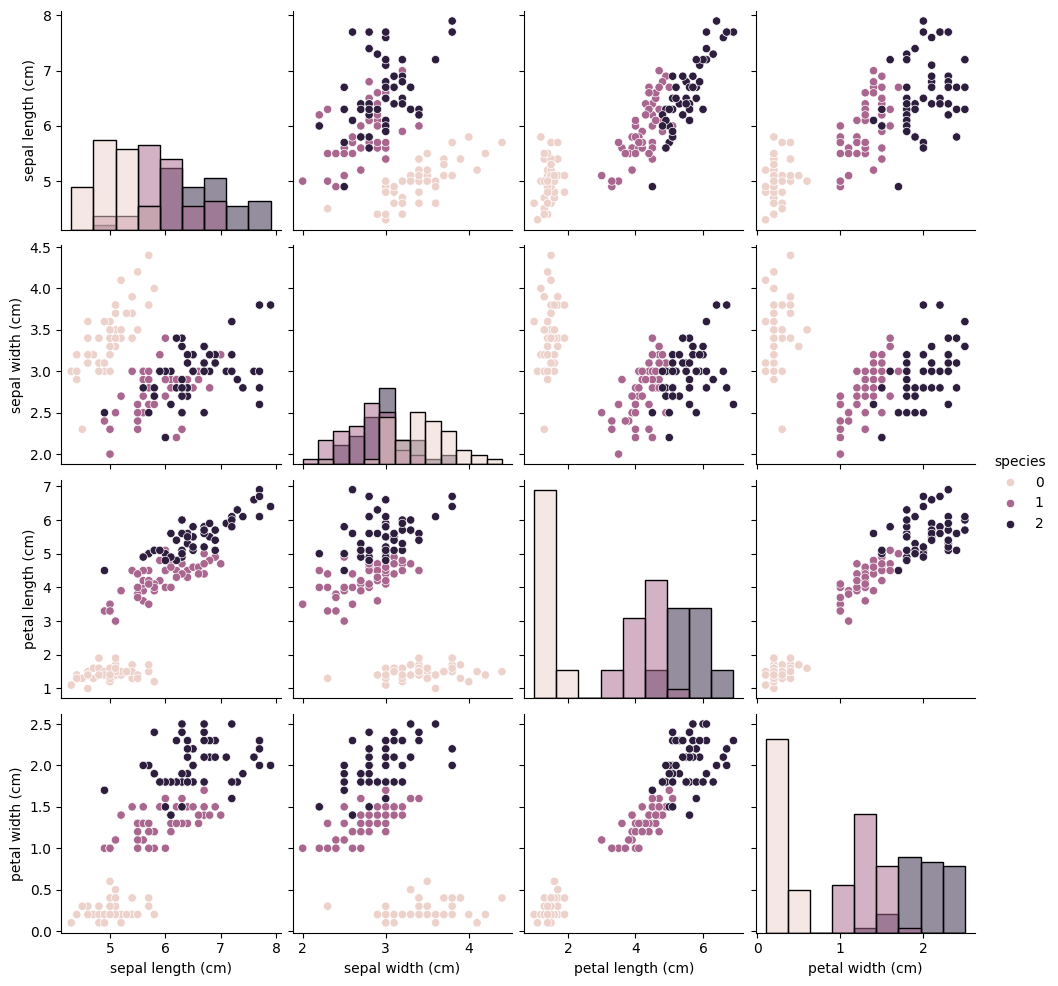

In [16]:
import seaborn as sns

# Add species to features for visualization purposes
iris_df = X_iris.copy()
iris_df['species'] = y_iris

# Create pairplot colored by species
sns.pairplot(iris_df, hue='species', diag_kind='hist')
plt.show()


- Petal width has a positive correlation with sepal width, sepal length, petal length.
- Sepal width has a positive correlation with petal width, petal length, and sepal length
- All species' measurements are clustered within its category, with little overlap over each others.

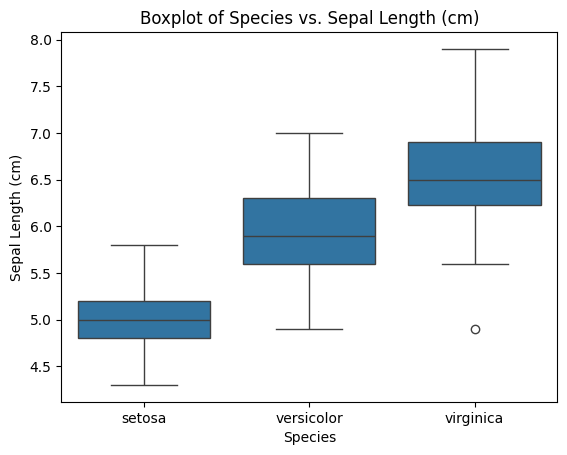

In [46]:
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Boxplot of Species vs. Sepal Length (cm)')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.xticks(ticks=[0, 1, 2], labels=iris_data.target_names)
plt.show()

- The sepal length for Setosa is significantly smaller compared to Versicolor and Virginica and it has a narrow range of values, indicating low variability.
- Virginica has the largest sepal length among the three species.
- There is at least one outlier in Virginica's sepal length distribution.

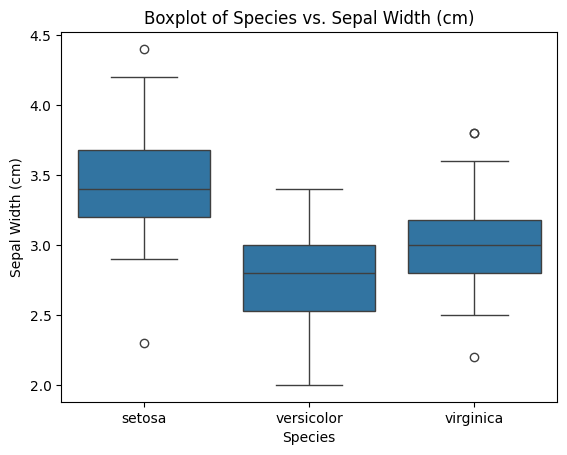

In [48]:
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df)
plt.title('Boxplot of Species vs. Sepal Width (cm)')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.xticks(ticks=[0, 1, 2], labels=iris_data.target_names)
plt.show()

- Setosa has the largest average sepal width compared to Versicolor and Virginica. The range of sepal width values for Setosa is relatively narrow, indicating low variability.
- Versicolor has an intermediate average sepal width, smaller than Setosa but larger than Virginica.
- Virginica has the smallest average sepal width among the three species. It also exhibits a narrower range of values, similar to Setosa.

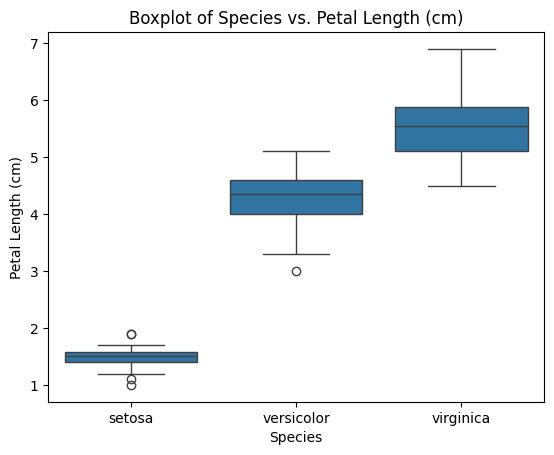

In [50]:
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title('Boxplot of Species vs. Petal Length (cm)')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(ticks=[0, 1, 2], labels=iris_data.target_names)
plt.show()

- Setosa has the smallest petal length among all species. The range of petal lengths for Setosa is narrow, with no overlap with Versicolor or Virginica.
- Versicolor has intermediate petal lengths, larger than Setosa but smaller than Virginica. There is some overlap in petal lengths with Virginica.
- Virginica has the largest petal lengths among all species. The range of values for Virginica is wider compared to Setosa and Versicolor.
- A few outliers are visible for Setosa and Versicolor.

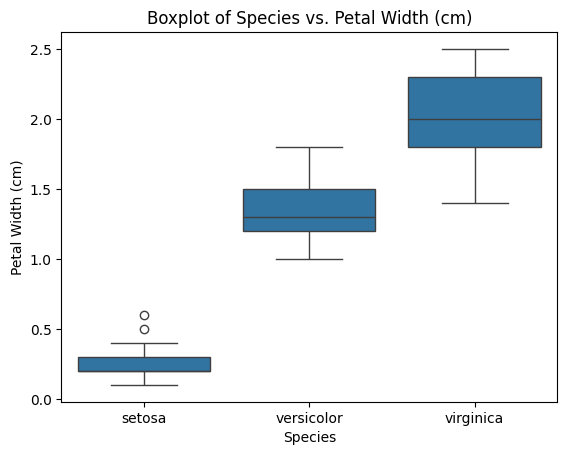

In [51]:
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
plt.title('Boxplot of Species vs. Petal Width (cm)')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.xticks(ticks=[0, 1, 2], labels=iris_data.target_names)
plt.show()

- Setosa has the smallest petal width among all species. The range of petal widths for Setosa is narrow, with no overlap with Versicolor or Virginica.
- Versicolor has intermediate petal widths, larger than Setosa but smaller than Virginica. There is some overlap in petal widths with Virginica.
- Virginica has the largest petal widths among all species. The range of values for Virginica is wider compared to Setosa and Versicolor.
- A few outliers are visible for Setosa and Versicolor.

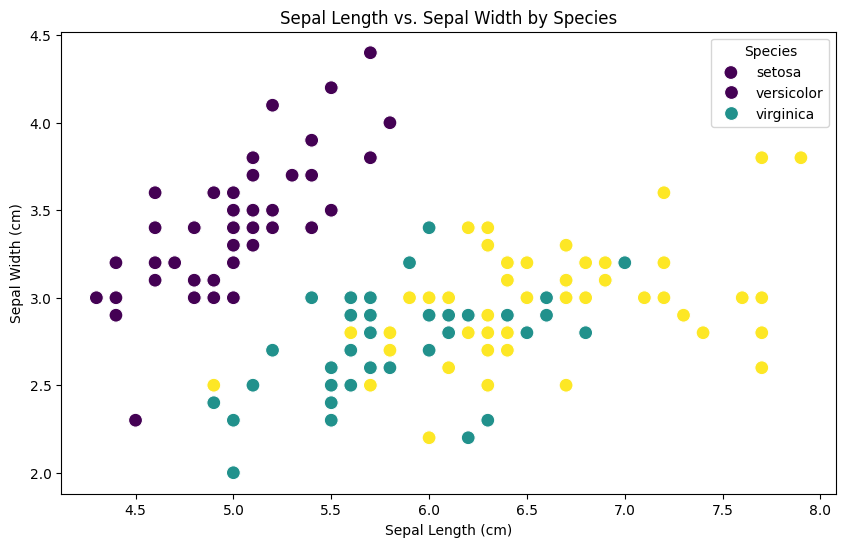

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=iris_df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species',
    palette='viridis',
    s=100
)
plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', labels=iris_data.target_names)
plt.show()

- The plot shows clear clustering of species based on their sepal dimensions.
- Setosa has distinct sepal measurements compared to Versicolor and Virginica, which overlap slightly.

## Part 5: Model creation and evaluation ##

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Scale data and split into training/testing sets
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_scaled_iris, y_iris, test_size=0.3)

# Train neural network classifier
classifier = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', random_state=42, max_iter=500)
classifier.fit(X_train_iris, y_train_iris)

# Generate predictions on the test set
predictions_iris = classifier.predict(X_test_iris)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test_iris, predictions_iris)

#classifier.score(X_test_iris, y_test_iris)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9333333333333333


Using hidden layer (50, 25, 10)

In [ ]:
# Train neural network classifier with different hidden layer
classifier = MLPClassifier(hidden_layer_sizes=(50, 25, 10), activation='relu', random_state=42, max_iter=500)
classifier.fit(X_train_iris, y_train_iris)

# Generate predictions on the test set
predictions_iris = classifier.predict(X_test_iris)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test_iris, predictions_iris)

#classifier.score(X_test_iris, y_test_iris)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9333333333333333


Using gridsearchCV

In [40]:
iris_grid_parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (125,75,50,25), (300,150,75,40), (200,100,50,25)],
}

grid_classifier = GridSearchCV(MLPClassifier(activation='relu', random_state=42, max_iter=5000), iris_grid_parameters, n_jobs=1)
grid_classifier.fit(X_train_iris, y_train_iris)


GridSearchCV(estimator=MLPClassifier(max_iter=5000, random_state=42), n_jobs=1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (125, 75, 50, 25),
                                                (300, 150, 75, 40),
                                                (200, 100, 50, 25)]})

In [41]:
y_grid_pred = grid_classifier.predict(X_test_iris)
print(accuracy_score(y_test_iris, y_grid_pred))
print(grid_classifier.best_params_)

0.9333333333333333
{'hidden_layer_sizes': (50, 50)}


Hidden layer (50,50) have the best results with an accuracy of 0.9333

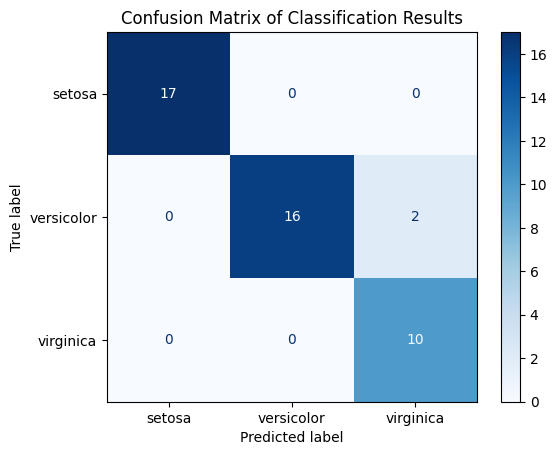

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_iris, predictions_iris)

# Display the confusion matrix with labels for the three species
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_data.target_names)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix of Classification Results')
plt.show()
